The purpose of this file is to plot the data of the IPCC assessed scenarios found on this link 

AR6

https://data.ene.iiasa.ac.at/ar6/#/downloads

Date 23 July 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
#read the dataframe 
ipcc = pd.read_csv(r'C:\Users\M.Amer\Desktop\GECF_Corona\workshops and interviews and participations\IAEE August 2022\AR6_Scenarios_Database_World_v1.0_selected.csv')

In [38]:
ipcc.head()

,Model,Scenario,Region,Variable,Unit,2000,2010,2020,2021,2040,2050,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Fo...,W/m^2,3.045605,3.409133,3.814538,3.833295,3.349680,2.962710,1.927079
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Fo...,W/m^2,2.620800,2.960894,3.384709,3.424797,3.290662,3.034364,2.224559
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Fo...,W/m^2,1.379375,1.465653,1.539508,1.528855,1.012560,0.801930,0.631099
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Fo...,W/m^2,1.009997,1.059885,1.127237,1.130388,0.819245,0.688762,0.593599
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Effective Radiative Fo...,W/m^2,0.514881,0.524778,0.557289,0.556581,0.323604,0.222678,0.171387


In [39]:
list(ipcc['Variable'].unique())

['AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|33.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|5.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|67.0th Percentile',
 'AR6 climate diagnostics|Effec

In [40]:
ipcc_unique_variables = ipcc['Variable'].value_counts().to_frame()

In [41]:
ipcc_unique_variables = ipcc_unique_variables.reset_index()

In [42]:
#get the variables that has primary energy in them


ipcc_unique_variables[ipcc_unique_variables["index"].str.contains("Primary Energy")]

,index,Variable
3,Primary Energy|Fossil,1898
4,Primary Energy|Gas,1898
5,Primary Energy|Coal,1891
6,Primary Energy|Non-Biomass Renewables,1891
7,Primary Energy|Oil,1891
...,...,...
1000,Primary Energy|Non-Biomass Renewables|Solar,163
1002,Primary Energy|Non-Biomass Renewables|Wind,161
1004,Primary Energy|Non-Biomass Renewables|Hydro,161
1035,Primary Energy|Non-Biomass Renewables|Geothermal,119


In [43]:
# get a list of energy variables 

energy_variables = ['Primary Energy', 'Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Fossil', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [44]:
# create a dataframe that has the required energy vairbales only 

energy_ipcc = ipcc[ipcc['Variable'].isin(energy_variables)]

In [45]:
# the assessment will be done on majour sources of energy up to 2050

energy_ipcc = energy_ipcc[['Scenario','Region','Variable','Unit','2050']]

In [46]:
energy_ipcc.head()

,Scenario,Region,Variable,Unit,2050
183,ADVANCE_2020_1.5C-2100,World,Primary Energy,EJ/yr,661.8941
185,ADVANCE_2020_1.5C-2100,World,Primary Energy|Coal,EJ/yr,13.9020
188,ADVANCE_2020_1.5C-2100,World,Primary Energy|Fossil,EJ/yr,133.9507
191,ADVANCE_2020_1.5C-2100,World,Primary Energy|Gas,EJ/yr,47.5205
195,ADVANCE_2020_1.5C-2100,World,Primary Energy|Nuclear,EJ/yr,24.9565


In [47]:
energy_ipcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16316 entries, 183 to 755576
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Scenario  16316 non-null  object 
 1   Region    16316 non-null  object 
 2   Variable  16316 non-null  object 
 3   Unit      16316 non-null  object 
 4   2050      16207 non-null  float64
dtypes: float64(1), object(4)
memory usage: 764.8+ KB


In [48]:
energy_ipcc = energy_ipcc.dropna()

In [49]:
energy_ipcc.Region.value_counts()

World    16207
Name: Region, dtype: int64

In [61]:
energy_ipcc.Unit.value_counts()

EJ/yr    16207
Name: Unit, dtype: int64

In [50]:
energy_ipcc = energy_ipcc[energy_ipcc['Region']=='World']

In [69]:
# energy_ipcc['VARIABLE'] = energy_ipcc['VARIABLE'].str.replace("Primary Energy| ","")

In [52]:
# pivot the dataframe - Take care that the index should not be the default value as the scenarios should be indexed to the scenario name, otherwise, you will get Na values


df_final = pd.pivot_table(energy_ipcc, values='2050', index=['Scenario'],columns=['Variable'], aggfunc=np.sum)


In [53]:
df_final.head()

Variable,Primary Energy,Primary Energy|Coal,Primary Energy|Fossil,Primary Energy|Gas,Primary Energy|Hydro,Primary Energy|Nuclear,Primary Energy|Oil,Primary Energy|Solar,Primary Energy|Wind
Scenario,,,,,,,,,
1,349.573000,0.000000,0.000000,0.000000,30.902000,NaN,0.000000,81.195000,127.565000
1.5C,1081.050900,101.763400,470.217500,204.484300,56.603200,54.322400,163.971100,83.620300,70.371500
1.5C A,468.547761,11.909262,91.886748,34.915291,20.473114,35.963487,45.062194,132.781359,105.200440
1.5C B,467.030837,11.909285,115.052446,36.126696,20.473114,35.963487,67.016465,121.822779,96.590691
1.5C C,468.547761,11.909262,91.886748,34.915291,20.473114,35.963487,45.062194,132.781359,105.200440


In [57]:
df_final.reset_index(inplace = True)

In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 1 to peak2025_DemandLow_FossilLow_TechHigh
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Primary Energy          847 non-null    float64
 1   Primary Energy|Coal     847 non-null    float64
 2   Primary Energy|Fossil   853 non-null    float64
 3   Primary Energy|Gas      853 non-null    float64
 4   Primary Energy|Hydro    701 non-null    float64
 5   Primary Energy|Nuclear  846 non-null    float64
 6   Primary Energy|Oil      847 non-null    float64
 7   Primary Energy|Solar    692 non-null    float64
 8   Primary Energy|Wind     692 non-null    float64
dtypes: float64(9)
memory usage: 66.6+ KB


In [58]:
df_final.head()

Variable,Scenario,Primary Energy,Primary Energy|Coal,Primary Energy|Fossil,Primary Energy|Gas,Primary Energy|Hydro,Primary Energy|Nuclear,Primary Energy|Oil,Primary Energy|Solar,Primary Energy|Wind
0,1.5C,1081.050900,101.763400,470.217500,204.484300,56.603200,54.322400,163.971100,83.620300,70.371500
1,1.5C A,468.547761,11.909262,91.886748,34.915291,20.473114,35.963487,45.062194,132.781359,105.200440
2,1.5C B,467.030837,11.909285,115.052446,36.126696,20.473114,35.963487,67.016465,121.822779,96.590691
3,1.5C C,468.547761,11.909262,91.886748,34.915291,20.473114,35.963487,45.062194,132.781359,105.200440
4,1.5C OPEC sell-out,560.853000,37.402000,240.339000,127.064000,24.337000,36.611000,75.874000,35.055000,15.916000


In [59]:
# convert the data to long formate again to make sure the scenarios we have hold all the energy sources of interest

df_final_long = df_final.melt(id_vars = ['Scenario'],
                                    value_vars = ['Primary Energy','Primary Energy|Coal','Primary Energy|Fossil','Primary Energy|Gas','Primary Energy|Hydro',	
                                    'Primary Energy|Nuclear','Primary Energy|Oil','Primary Energy|Solar','Primary Energy|Wind'],
                                    var_name = 'Energy Source',
                                    value_name = 'Demand EJ/yr')

In [60]:
df_final_long.head()

,Scenario,Energy Source,Demand EJ/yr
0,1.5C,Primary Energy,1081.050900
1,1.5C A,Primary Energy,468.547761
2,1.5C B,Primary Energy,467.030837
3,1.5C C,Primary Energy,468.547761
4,1.5C OPEC sell-out,Primary Energy,560.853000


In [74]:
df_final_long.Scenario.nunique()

687

## Complete function to convert the sheet into a clean form

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

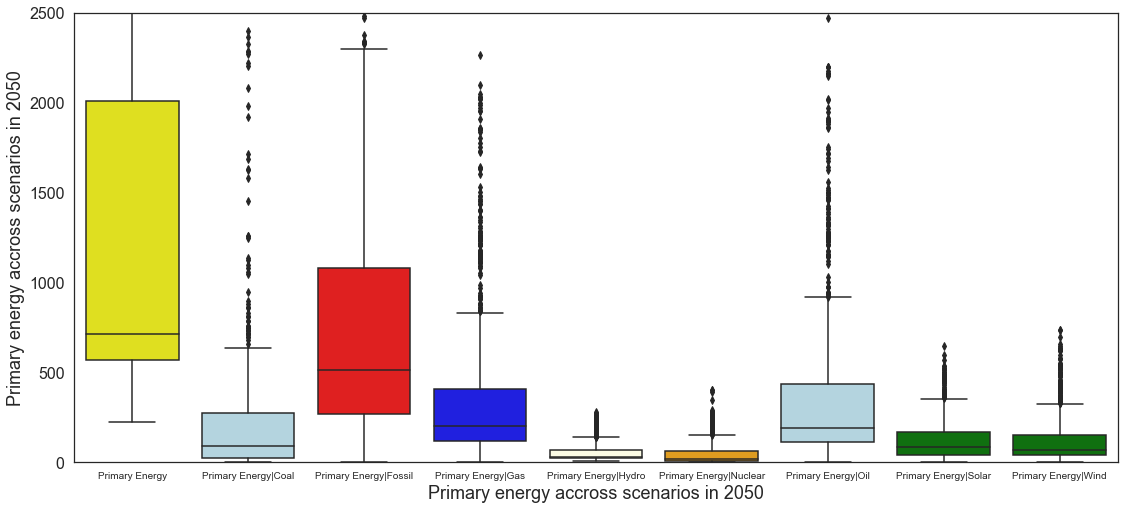

In [71]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(18.7,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Energy Source', y='Demand EJ/yr', data=df_final_long, palette={'Primary Energy':'yellow', 'Primary Energy|Nuclear':'orange','Primary Energy|Oil':'lightblue', 'Primary Energy|Coal':'lightblue', 'Primary Energy|Gas':'blue', 'Primary Energy|Fossil':'red', 'Primary Energy|Hydro':'lightyellow', 'Primary Energy|Wind':'green', 'Primary Energy|Solar':'green'})
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0, 2500)

plt.xlabel('Primary energy accross scenarios in 2050', size = 18)
plt.xticks(size = 10)


